In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train=pd.read_csv('/Users/punitshah/Downloads/Bank_churn.csv')

In [6]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
train.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4995,15573348,Maclean,850,France,Male,35,9,102050.47,1,1,1,3769.71,0
4996,15810834,Gordon,525,Spain,Female,57,2,145965.33,1,1,1,64448.36,0
4997,15683524,Tobenna,660,Germany,Female,23,6,166070.48,2,0,0,90494.72,0
4998,15776780,He,608,France,Male,59,1,0.00,1,1,0,70649.64,1
4999,15675176,Price,512,France,Male,51,6,144953.31,1,1,1,165035.17,0


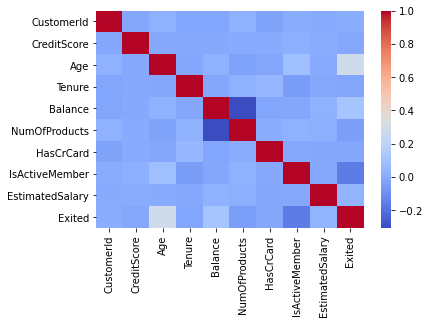

In [5]:
#Check for columnwise null values, if it is present the heatmap will show yellow lines for every row
sns.heatmap(train.corr(),yticklabels=True,cbar=True,cmap='coolwarm')

In [6]:
train.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       5000 non-null   int64  
 1   Surname          5000 non-null   object 
 2   CreditScore      5000 non-null   int64  
 3   Geography        5000 non-null   object 
 4   Gender           5000 non-null   object 
 5   Age              5000 non-null   int64  
 6   Tenure           5000 non-null   int64  
 7   Balance          5000 non-null   float64
 8   NumOfProducts    5000 non-null   int64  
 9   HasCrCard        5000 non-null   int64  
 10  IsActiveMember   5000 non-null   int64  
 11  EstimatedSalary  5000 non-null   float64
 12  Exited           5000 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 507.9+ KB


In [8]:
train.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,5.000000e+03,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,1.569282e+07,651.468200,38.92680,5.024800,76991.662032,1.525800,0.707600,0.516200,99576.321218,0.20560
std,7.166645e+04,97.056418,10.63519,2.910993,62107.970622,0.582239,0.454911,0.499787,57405.698017,0.40418
min,1.556581e+07,350.000000,18.00000,0.000000,0.000000,1.000000,0.000000,0.000000,91.750000,0.00000
25%,1.563227e+07,584.000000,32.00000,2.000000,0.000000,1.000000,0.000000,0.000000,49822.480000,0.00000
50%,1.569236e+07,652.000000,37.00000,5.000000,97370.100000,1.000000,1.000000,1.000000,99953.470000,0.00000
75%,1.575615e+07,720.000000,44.00000,8.000000,127993.645000,2.000000,1.000000,1.000000,148016.977500,0.00000
max,1.581566e+07,850.000000,92.00000,10.000000,250898.090000,4.000000,1.000000,1.000000,199909.320000,1.00000


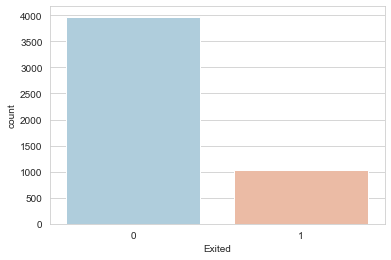

In [9]:
#Check the count of 'Exited' cusotmers
sns.set_style('whitegrid')
sns.countplot(x='Exited',data=train,palette='RdBu_r')

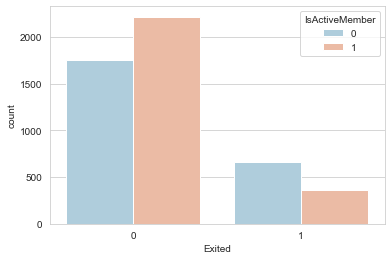

In [10]:
# check the count of customers who exited the bank and was active member 

sns.set_style('whitegrid')

sns.countplot(x='Exited',hue='IsActiveMember',data=train,palette='RdBu_r')


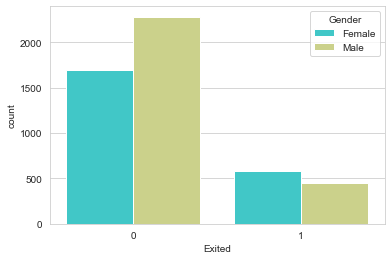

In [11]:
# check for the genderwise count of customers who 'exited' from bank

sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='Gender',data=train,palette='rainbow')

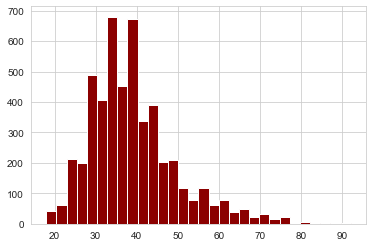

In [12]:
# check the histogram for all customers agewise

train['Age'].hist(bins=30,color='darkred',alpha=1.0)

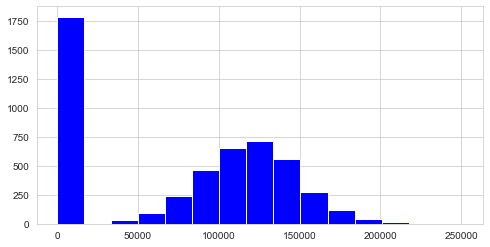

In [13]:
# histogram for average balance customers have in there account

train['Balance'].hist(color='blue',bins=15,figsize=(8,4))

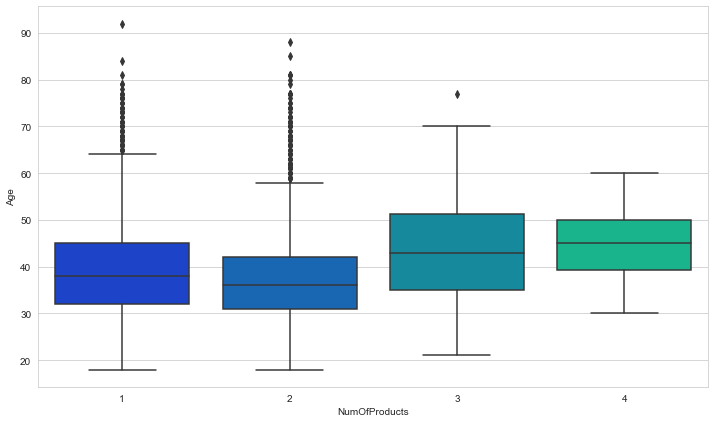

In [14]:
# agewise  active products 
plt.figure(figsize=(12, 7))
sns.boxplot(x='NumOfProducts',y='Age',data=train,palette='winter')

In [15]:
# converting gender to 0 and 1 
# drop non numeric columns 

Gender=pd.get_dummies(train['Gender'],drop_first=True)
train=pd.concat([train,Gender], axis=1)
train.drop(['Surname','Geography','Gender'], axis=1, inplace=True)

In [16]:
# check the type of column values 
train.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,15609562,774,43,1,116360.07,1,1,0,17004.14,0,0
1,15578096,537,26,7,106397.75,1,0,0,103563.23,0,1
2,15674928,850,37,2,0.00,2,1,0,119969.99,0,1
3,15765322,755,23,5,84284.48,2,1,1,62851.60,0,1
4,15647572,504,34,0,54980.81,1,1,1,136909.88,0,1


In [17]:
# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [19]:
# split data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(train.drop('Exited',axis=1), 
                                                    train['Exited'], test_size=0.2, 
                                                    random_state=101)

In [21]:
X_train.shape

(4000, 10)

In [22]:
X_test.shape

(1000, 10)

In [23]:
# import logistic regression fromm sklearn library
from sklearn.linear_model import LogisticRegression

In [24]:
# fit the model on the training variables X_train and Y_train

logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

C:\Users\punit.shah1\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# Test the model on x_test

predictions = logmodel.predict(X_test)

In [29]:
logmodel.predict_proba(X_test)

array([[0.85156373, 0.14843627],
       [0.84249866, 0.15750134],
       [0.73774757, 0.26225243],
       ...,
       [0.85629304, 0.14370696],
       [0.78246629, 0.21753371],
       [0.83999868, 0.16000132]])

In [26]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
# Model Evaluation

from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       783
           1       0.00      0.00      0.00       217

    accuracy                           0.78      1000
   macro avg       0.39      0.50      0.44      1000
weighted avg       0.61      0.78      0.69      1000



C:\Users\punit.shah1\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
# Check accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [36]:
accuracy_score(y_test, predictions)

0.783

In [37]:
confusion_matrix(y_test,predictions)

array([[783,   0],
       [217,   0]], dtype=int64)

In [41]:
y_test.value_counts()

0    783
1    217
Name: Exited, dtype: int64